### Vergelijking ABM libary's

## Omschrijving
Notebook gemaakt om de verschillen te bekijken tussen de verschillende libarys die we zouden kunnen gebruiken in ons project

De volgende libarys hebben wij in overweging genomen.
- Mesa
- AgentPy
- BPTK-Py
- GAMA

Van af het begin is het all snel duidelijk dat GAMA afvalt aangezien dit een volledig eigen installatie heeft en niet een python libary.

We kijken vooral naar gemak van het opstellen van een simulatie en de snelheid mee waar de simulatie runt.

#### Benodigde imports
Deze imports zijn nodig om de notebook te kunnen draaien en de resultaten te plotten.

In [1]:
# Import of libary's
# AgentPy
import agentpy as ap
# Mesa
import mesa
# Data visualization tools.
import seaborn as sns
# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np
# Data manipulation and analysis.
import pandas as pd

#### Pandas dataframe
Om de verkregen data per simulatie run op te slaan. Om later te plotten in grafieken.

In [2]:
# Sim info dataframe.
sim_info_df = pd.DataFrame()


#### AgentPy Setup
Hier onder is de classen structuur en functies te vinden voor de AgentPy simulatie.

In [3]:
class AgentPyMoneyAgent(ap.Agent):
    def setup(self):
        self.wealth = 1

    def wealth_transfer(self):
        if self.wealth == 0:
            return
        a = self.model.agents.random()
        a.wealth += 1
        self.wealth -= 1

class AgentPyMoneyModel(ap.Model):
    def setup(self):
        self.agents = ap.AgentList(self, self.p.n, AgentPyMoneyAgent)

    def step(self):
        self.agents.record('wealth')
        self.agents.wealth_transfer()

#### MESA Setup
Hier onder is de setup voor dezelfde simulatie te vinden alleen in dit geval is er mesa gebruikt.


In [4]:
class MesaMoneyAgent(mesa.Agent):
    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def exchange(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1

class MesaMoneyModel(mesa.Model):
    def __init__(self, n):
        super().__init__()
        self.num_agents = n
        MesaMoneyAgent.create_agents(model=self, n=n)

    def step(self):
        self.agents.shuffle_do("exchange")

Geoptimaliseerde MESA Doormiddel van GTP

AgentPy Agent count : 10
Completed: 100 steps
Run time: 0:00:00.018998
Simulation finished
AgentPy Agent count : 50
Completed: 100 steps
Run time: 0:00:00.052002
Simulation finished
AgentPy Agent count : 100
Completed: 100 steps
Run time: 0:00:00.095514
Simulation finished
AgentPy Agent count : 200
Completed: 100 steps
Run time: 0:00:00.236516
Simulation finished
AgentPy Agent count : 500
Completed: 100 steps
Run time: 0:00:00.556797
Simulation finished
AgentPy Agent count : 1000
Completed: 100 steps
Run time: 0:00:01.454792
Simulation finished
AgentPy Agent count : 10000
Completed: 100 steps
Run time: 0:00:12.825487
Simulation finished
Mesa Agent count : 10
Mesa Agent count : 50
Mesa Agent count : 100
Mesa Agent count : 200
Mesa Agent count : 500
Mesa Agent count : 1000
Mesa Agent count : 10000


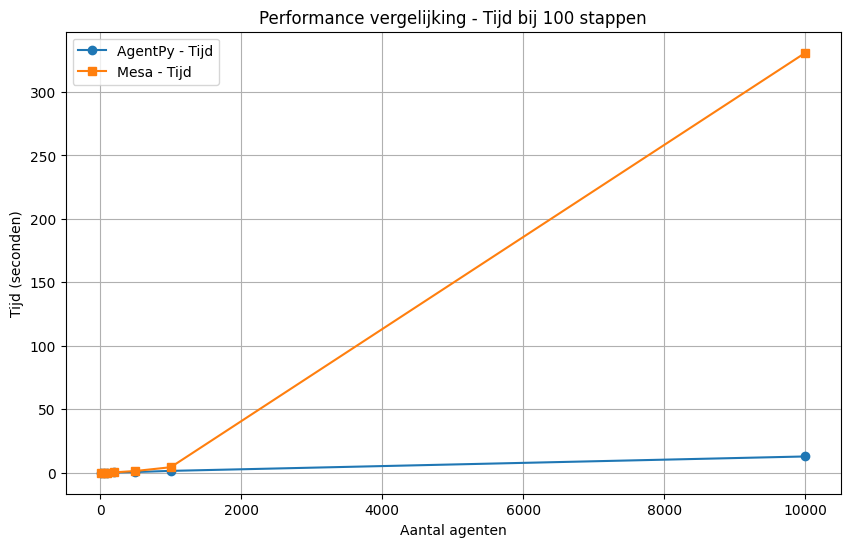

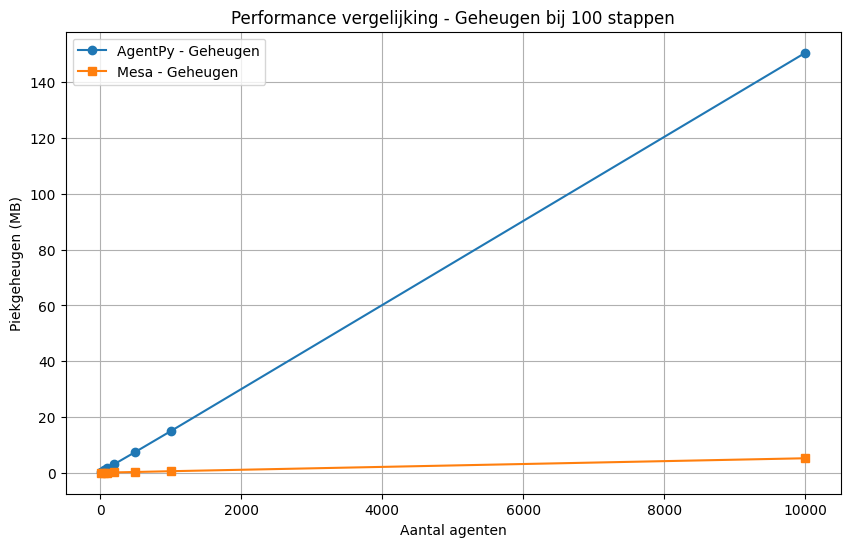

In [20]:
import time
import matplotlib.pyplot as plt
import numpy as np
import tracemalloc

# Stapgrootte en agent ranges
n_steps = 100
agent_counts = [10, 50, 100, 200, 500, 1000, 10_000]

# Tijdmetingen en geheugengebruik opslaan
agentpy_times = []
agentpy_memory = []
mesa_times = []
mesa_memory = []

# AGENTPY timing + memory
for n_agents in agent_counts:
    parameters = {'n': n_agents, 'steps': n_steps}
    print(f"AgentPy Agent count : {n_agents}")

    tracemalloc.start()
    start = time.time()
    model = AgentPyMoneyModel(parameters)
    model.run()
    end = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    agentpy_times.append(end - start)
    agentpy_memory.append(peak / 10**6)  # in MB

# MESA timing + memory
for n_agents in agent_counts:
    print(f"Mesa Agent count : {n_agents}")

    tracemalloc.start()
    start = time.time()
    model = MesaMoneyModel(n_agents)
    for _ in range(n_steps):
        model.step()
    end = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    mesa_times.append(end - start)
    mesa_memory.append(peak / 10**6)  # in MB

# === Plot tijd ===
plt.figure(figsize=(10, 6))
plt.plot(agent_counts, agentpy_times, marker='o', label='AgentPy - Tijd')
plt.plot(agent_counts, mesa_times, marker='s', label='Mesa - Tijd')
plt.xlabel('Aantal agenten')
plt.ylabel('Tijd (seconden)')
plt.title(f'Performance vergelijking - Tijd bij {n_steps} stappen')
plt.legend()
plt.grid(True)
plt.show()

# === Plot geheugen ===
plt.figure(figsize=(10, 6))
plt.plot(agent_counts, agentpy_memory, marker='o', label='AgentPy - Geheugen')
plt.plot(agent_counts, mesa_memory, marker='s', label='Mesa - Geheugen')
plt.xlabel('Aantal agenten')
plt.ylabel('Piekgeheugen (MB)')
plt.title(f'Performance vergelijking - Geheugen bij {n_steps} stappen')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
print("AgentPY")
print(agent_counts)
print(agentpy_times)

print("MESA")
print(agent_counts)
print(mesa_times)

# 

AgentPY
[10, 50, 100, 200, 500, 1000, 10000]
[0.006009340286254883, 0.014768362045288086, 0.029016494750976562, 0.05041670799255371, 0.1401209831237793, 0.28446316719055176, 3.0546658039093018]
MESA
[10, 50, 100, 200, 500, 1000, 10000]
[0.002512693405151367, 0.013509273529052734, 0.04719662666320801, 0.1418600082397461, 0.8151266574859619, 2.9688379764556885, 301.4055345058441]
